In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [59]:

treinamento = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/emotions_train.txt", sep=";", names=['Text','Emotion'])
teste = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/emotions_test.txt", sep=";", names=['Text','Emotion'])
data = treinamento.append(teste)

more_data = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/more_emotions.csv")
#adiciona os dados de more_data ao dataframe 
#remove os indices que tem emoção = happy ou sadness pq ja tem muito dados d felicidade e d triteza 
more_data = more_data.drop(more_data[(more_data['Emotion'] == "happy") | (more_data['Emotion'] == "sadness")].index)
print(more_data['Emotion'].unique())

data = data.append(more_data)
data.head()

treinamento, teste = train_test_split(data, test_size=0.3)


['anger' 'love' 'surprise' 'fear']


In [ ]:

#nuvem de palavras base de dados 1
from matplotlib import pyplot as plt


figura = plt.figure(figsize=(12,12))
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
joy = 0
for c in data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "joy":
          joy += 1
     
#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "joy"], [sadness, anger, love, surprise, fear, joy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 
"""PROVA QUE OS DAODOS AFETAM DIRETAMENTE O RESULTADO DO ALGORITIMO
o que tem menos dados é o que ele mais errou"""
print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, joy: {joy}")

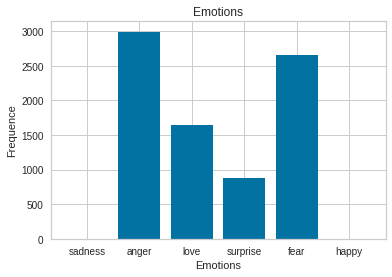

sad: 0, anger: 2993, love: 1641, surprise: 879, fear: 2652, happy: 0 


In [61]:
#nuvem de palavras
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
happy = 0
for c in more_data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "happy":
          happy += 1

#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "happy"], [sadness, anger, love, surprise, fear, happy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 
"""PROVA QUE OS DAODOS AFETAM DIRETAMENTE O RESULTADO DO ALGORITIMO
o que tem menos dados é o que ele mais errou"""
print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, happy: {happy} ")

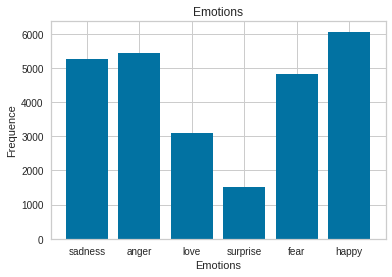

sad: 5247, anger: 5427, love: 3104, surprise: 1517, fear: 4813, happy: 6057 


In [62]:
#grafico data

#nuvem de palavras
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
happy = 0
for c in data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "joy":
          happy += 1

#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "happy"], [sadness, anger, love, surprise, fear, happy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 

print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, happy: {happy} ")

In [63]:
#padronização 
 
cv = CountVectorizer()
vector = cv.fit(data['Text'])

dados_previsores_treinamento = treinamento.iloc[:, 0].values
classes_treinamento = treinamento.iloc[:, 1].values

dados_previsores_teste = teste.iloc[:, 0].values
classes_teste = teste.iloc[:, 1].values

dados_previsores_treinamento = vector.transform(dados_previsores_treinamento)
dados_previsores_teste = vector.transform(dados_previsores_teste)

def emotions(string,vector,model):
     vectorized = vector.transform([string])
     pred = model.predict(vectorized)
     return pred

Iteration 1, loss = 1.13593280
Iteration 2, loss = 0.21272375
Iteration 3, loss = 0.06880719
Iteration 4, loss = 0.03445005
Iteration 5, loss = 0.02336705
Iteration 6, loss = 0.01882246
Iteration 7, loss = 0.01585103
Iteration 8, loss = 0.01820849
Iteration 9, loss = 0.02034316
Iteration 10, loss = 0.02843456
Iteration 11, loss = 0.03337633
Iteration 12, loss = 0.01861271
Iteration 13, loss = 0.01308169
Iteration 14, loss = 0.00937661
Iteration 15, loss = 0.00867992
Iteration 16, loss = 0.00738795
Iteration 17, loss = 0.00700416
Iteration 18, loss = 0.00682851
Iteration 19, loss = 0.00582500
Iteration 20, loss = 0.00627762
Iteration 21, loss = 0.00637219
Iteration 22, loss = 0.00574183
Iteration 23, loss = 0.00633157
Iteration 24, loss = 0.00491538
Iteration 25, loss = 0.00512830
Iteration 26, loss = 0.00564772
Iteration 27, loss = 0.00546523
Iteration 28, loss = 0.00510056
Iteration 29, loss = 0.00496580
Iteration 30, loss = 0.00493045
Iteration 31, loss = 0.00481324
Iteration 32, los

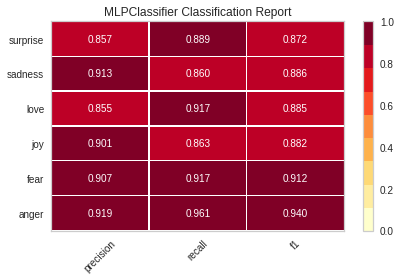

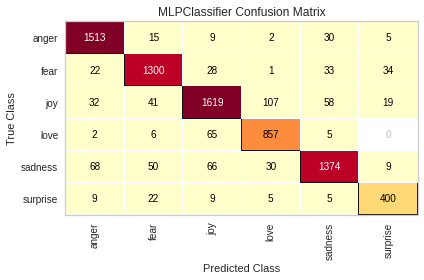

In [64]:
 

#aplica a rede neural
from sklearn.neural_network import MLPClassifier

rede_neural = MLPClassifier(verbose=True, max_iter=1000, tol=0.00000000000001, hidden_layer_sizes=(100, 100, 100, 100, 100), random_state=0)

#treina a rede neural
rede_neural.fit(dados_previsores_treinamento, classes_treinamento)


#testa a rede neural
previsoes = rede_neural.predict(dados_previsores_teste)

#pontuação
pontuação = accuracy_score(classes_teste, previsoes)
print(pontuação)#0.9030573248407643

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
cm = ClassificationReport(rede_neural)
cm.fit(dados_previsores_treinamento, classes_treinamento)
cm.score(dados_previsores_teste, classes_teste)
cm.poof()

#grafico da pontuação dele
cm2 = ConfusionMatrix(rede_neural)
cm2.fit(dados_previsores_treinamento, classes_treinamento)
cm2.score(dados_previsores_teste, classes_teste)
cm2.poof()


# while True:
#   txt = input("escreve algo")
#   print(txt)
#   print(emotions(txt, vector, rede_neural))



In [ ]:
#salva o modelo
import pickle
pickle.dump(rede_neural, open("nlp_emoções.pickle", "wb"))
pickle.dump(vector, open("transformador_nlp.pickle", "wb"))


while True:
  txt = input("escreve algo")
  print(txt)
  print(emotions(txt, vector, rede_neural))
  



escreve algohow are you?
how are you?
['joy']


# Nova seção